In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = "Android"
dir_path = "../data/"

In [3]:
# Cargar el dataset
logDF = pd.read_csv(f"{dir_path}{dataset}_2k.log_structured.csv")
categorias = {
    'D': 'Informativo',
    'V': 'Informativo',
    'E': 'Error',
    'W': 'Advertencia',
    'I': 'Informativo'
}
logDF['Level'] = logDF['Level'].replace(categorias)

logDF.head(2)


,LineId,Date,Time,Pid,Tid,Level,Component,Content,EventId,EventTemplate
0,1,03-17,16:13:38.811,1702,2395,Informativo,WindowManager,printFreezingDisplayLogsopening app wtoken = A...,E100,printFreezingDisplayLogsopening app wtoken = A...
1,2,03-17,16:13:38.819,1702,8671,Informativo,PowerManagerService,"acquire lock=233570404, flags=0x1, tag=""View L...",E10,"acquire lock=<*>, flags=<*>, tag=""<*>"", name=<..."


In [6]:
# Fecha y hora
logDF['datetime'] = pd.to_datetime('2024-' + logDF['Date'] + ' ' + logDF['Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S.%f')
# Asegurarse de que la columna es datetime
logDF['datetime'] = pd.to_datetime(logDF['datetime'], errors='coerce')

# Convertir al formato con milisegundos exactos, truncando a 3 decimales (mmm)
logDF['datetime'] = logDF['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]
logDF.head()

,LineId,Date,Time,Pid,Tid,Level,Component,Content,EventId,EventTemplate,datetime
0,1,03-17,16:13:38.811,1702,2395,Informativo,WindowManager,printFreezingDisplayLogsopening app wtoken = A...,E100,printFreezingDisplayLogsopening app wtoken = A...,2024-03-17 16:13:38.811
1,2,03-17,16:13:38.819,1702,8671,Informativo,PowerManagerService,"acquire lock=233570404, flags=0x1, tag=""View L...",E10,"acquire lock=<*>, flags=<*>, tag=""<*>"", name=<...",2024-03-17 16:13:38.819
2,3,03-17,16:13:38.820,1702,8671,Informativo,PowerManagerService,"ready=true,policy=3,wakefulness=1,wksummary=0x...",E103,"ready=true,policy=<*>,wakefulness=<*>,wksummar...",2024-03-17 16:13:38.820
3,4,03-17,16:13:38.839,1702,2113,Informativo,WindowManager,Skipping AppWindowToken{df0798e token=Token{78...,E131,Skipping AppWindowToken{<*> token=Token{<*> Ac...,2024-03-17 16:13:38.839
4,5,03-17,16:13:38.859,2227,2227,Informativo,TextView,visible is system.time.showampm,E165,visible is <*>,2024-03-17 16:13:38.859


In [7]:
# Longitud de cada mensaje (# palabras)
logDF['content_length'] = logDF['Content'].astype(str).apply(lambda x: len(x.split()))


In [8]:
# Estadísticas
print("Total de registros:", len(logDF))
print("Rango temporal:", logDF['datetime'].min(), "→", logDF['datetime'].max())
print("Distribución por nivel:", logDF['Level'].value_counts())
print("Longitud de mensaje (palabras) con promedio:", logDF['content_length'].mean())
print("Longitud de mensaje (palabras) con mediana:", logDF['content_length'].median())

Total de registros: 2000
Rango temporal: 2024-03-17 16:13:38.811 → 2024-03-17 16:16:09.141
Distribución por nivel: Level
Informativo    1827
Advertencia     170
Error             3
Name: count, dtype: int64
Longitud de mensaje (palabras) con promedio: 5.3985
Longitud de mensaje (palabras) con mediana: 3.0


C:\Users\KARINA\AppData\Local\Temp\ipykernel_16280\3905531008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")


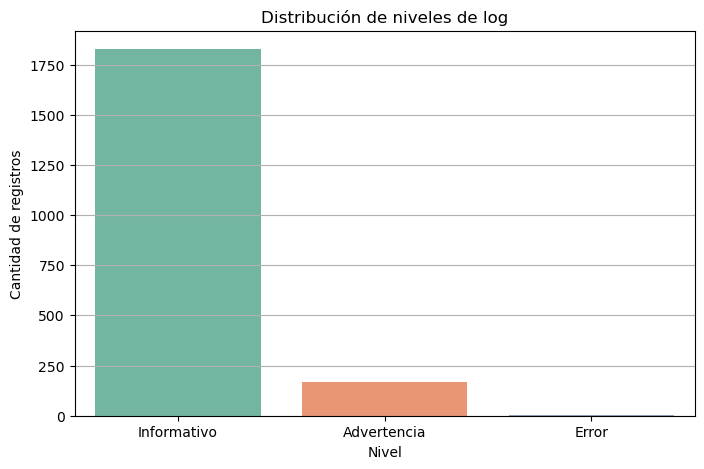

In [9]:
# Distribución por nivel
plt.figure(figsize=(8,5))
sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")
plt.title("Distribución de niveles de log")
plt.xlabel("Nivel")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y')
plt.show()

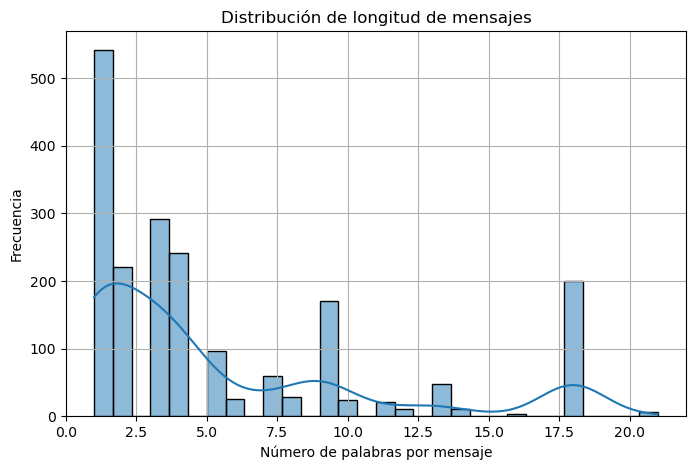

In [10]:
# Longitud de mensajes
plt.figure(figsize=(8,5))
sns.histplot(logDF['content_length'], bins=30, kde=True)
plt.title("Distribución de longitud de mensajes")
plt.xlabel("Número de palabras por mensaje")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [12]:
logDF.to_csv(f"{dir_path}{dataset}_2k.log_structured_to_process.csv", index=False, encoding='utf-8')